In [1]:
from qiskit.quantum_info import SparsePauliOp, random_pauli, random_hermitian, random_clifford, random_unitary, pauli_basis, Pauli, PauliList
import numpy as np

In [2]:
## H = 1/sqrt(2) (X + Z)
hadamard = 1/np.sqrt(2)*(SparsePauliOp('Z')+SparsePauliOp('X'))
## HZH = X
(hadamard @ SparsePauliOp('Z') @ hadamard).simplify() == SparsePauliOp('X')

True

In [3]:
## Clifford gate maps one Pauli to another Pauli
theta = np.pi/4
s_gate = np.exp(1j*theta)*(np.cos(-theta)*SparsePauliOp('I') + 1j*np.sin(-theta)*SparsePauliOp('Z'))
(s_gate.adjoint() @ SparsePauliOp('X') @ s_gate).simplify() 

SparsePauliOp(['Y'],
              coeffs=[-1.+1.23259516e-32j])

In [4]:
## T gate transforms one Pauli to two Paulis
# t_gate = np.array([[1, 0], [0, np.exp(1j*np.pi/4)]])
theta = np.pi/8
t_gate = np.exp(1j*theta)*(np.cos(-theta)*SparsePauliOp('I') + 1j*np.sin(-theta)*SparsePauliOp('Z'))
# t_gate
# t_gate == t_gate_p.to_matrix()
(t_gate.adjoint() @ SparsePauliOp('X') @ t_gate).simplify()

SparsePauliOp(['X', 'Y'],
              coeffs=[ 0.70710678+2.55564914e-17j, -0.70710678+1.21941298e-17j])

In [5]:
## CNOT gate
cnot = 0.5*(SparsePauliOp('I')+SparsePauliOp('Z')).tensor(SparsePauliOp('I')) + 0.5*(SparsePauliOp('I')-SparsePauliOp('Z')).tensor(SparsePauliOp('X'))
cnot.to_matrix()

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [6]:
from scipy.linalg import expm
t = 1
print(expm(1j*t*SparsePauliOp('XX').to_matrix()))
cnot.to_matrix() @ np.kron(expm(1j*t*SparsePauliOp('X').to_matrix()), SparsePauliOp('I').to_matrix()) @ cnot.to_matrix()

[[0.54030231+0.j         0.        +0.j         0.        +0.j
  0.        +0.84147098j]
 [0.        +0.j         0.54030231+0.j         0.        +0.84147098j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.84147098j 0.54030231+0.j
  0.        +0.j        ]
 [0.        +0.84147098j 0.        +0.j         0.        +0.j
  0.54030231+0.j        ]]


array([[0.54030231+0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.84147098j],
       [0.        +0.j        , 0.54030231+0.j        ,
        0.        +0.84147098j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.84147098j,
        0.54030231+0.j        , 0.        +0.j        ],
       [0.        +0.84147098j, 0.        +0.j        ,
        0.        +0.j        , 0.54030231+0.j        ]])

In [7]:
np.linalg.multi_dot([SparsePauliOp('Z'), SparsePauliOp('X')])

array([[ 0.+0.j,  1.+0.j],
       [-1.+0.j,  0.+0.j]])

In [8]:
pauli_basis(3, weight=True)

PauliList(['III', 'IIX', 'IIY', 'IIZ', 'IXI', 'IYI', 'IZI', 'XII', 'YII',
           'ZII', 'IXX', 'IXY', 'IXZ', 'IYX', 'IYY', 'IYZ', 'IZX', 'IZY',
           'IZZ', 'XIX', 'XIY', 'XIZ', 'XXI', 'XYI', 'XZI', 'YIX', 'YIY',
           'YIZ', 'YXI', 'YYI', 'YZI', 'ZIX', 'ZIY', 'ZIZ', 'ZXI', 'ZYI',
           'ZZI', 'XXX', 'XXY', 'XXZ', 'XYX', 'XYY', 'XYZ', 'XZX', 'XZY',
           'XZZ', 'YXX', 'YXY', 'YXZ', 'YYX', 'YYY', 'YYZ', 'YZX', 'YZY',
           'YZZ', 'ZXX', 'ZXY', 'ZXZ', 'ZYX', 'ZYY', 'ZYZ', 'ZZX', 'ZZY',
           'ZZZ'])

In [9]:
# 1. init from list[str]
pauli_list = PauliList(["II", "+ZI", "-iYY"])
print("1. ", pauli_list)
pauli1 = Pauli("iXI")
pauli2 = Pauli("iZZ")
# 2. init from Pauli
print("2. ", PauliList(pauli1))
# 3. init from list[Pauli]
print("3. ", PauliList([pauli1, pauli2]))
# 4. init from np.ndarray
z = np.array([[True, True], [False, False]])
x = np.array([[False, True], [True, False]])
phase = np.array([0, 1])
pauli_list = PauliList.from_symplectic(z, x, phase)
print("4. ", pauli_list)

1.  ['II', 'ZI', '-iYY']
2.  ['iXI']
3.  ['iXI', 'iZZ']
4.  ['YZ', '-iIX']


In [10]:
random_pauli(3)

Pauli('XZX')

In [11]:
random_hermitian(4)

Operator([[ 0.19563572+0.j        , -0.34949843+0.19857586j,
            0.83280881+0.55313268j,  0.47493054+0.47886845j],
          [-0.34949843-0.19857586j,  0.07492891+0.j        ,
            0.4509892 +0.88952503j,  0.02230886+0.16787478j],
          [ 0.83280881-0.55313268j,  0.4509892 -0.88952503j,
           -1.16097892+0.j        ,  0.53451574+0.20025561j],
          [ 0.47493054-0.47886845j,  0.02230886-0.16787478j,
            0.53451574-0.20025561j,  0.96431441+0.j        ]],
         input_dims=(2, 2), output_dims=(2, 2))


In [12]:
n  = 4
magn_op = SparsePauliOp.from_sparse_list([('Z', [i], 1/n) for i in range(0, n)], n)
corr_op = SparsePauliOp.from_sparse_list([('ZZ', [i,i+1], 1/(n-1)) for i in range(0, n-1)], n)
magn_op

SparsePauliOp(['IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])

In [13]:
random_unitary(4)

Operator([[ 0.30339651-0.29378955j,  0.41812105+0.53345389j,
            0.02996677+0.0477788j ,  0.50021341-0.32991775j],
          [ 0.08627364+0.1147221j , -0.12798155+0.48938825j,
           -0.45525061+0.21294825j, -0.60569578-0.32256488j],
          [ 0.46101079-0.19616925j, -0.00931651+0.10441684j,
            0.29393226-0.6990146j , -0.39535157+0.08171021j],
          [-0.66744201-0.32332923j, -0.23960744+0.46510235j,
            0.4071596 -0.05850279j, -0.07574714+0.03617038j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [14]:
random_clifford(4)

Clifford(array([[ True, False,  True,  True,  True, False,  True, False, False],
       [False, False, False,  True, False, False, False, False,  True],
       [False,  True, False, False,  True,  True,  True, False,  True],
       [False,  True,  True, False, False, False,  True, False,  True],
       [ True, False,  True, False, False, False,  True, False,  True],
       [ True,  True,  True, False,  True,  True, False,  True, False],
       [False,  True,  True,  True,  True,  True, False, False,  True],
       [False, False,  True, False, False,  True,  True, False,  True]]))

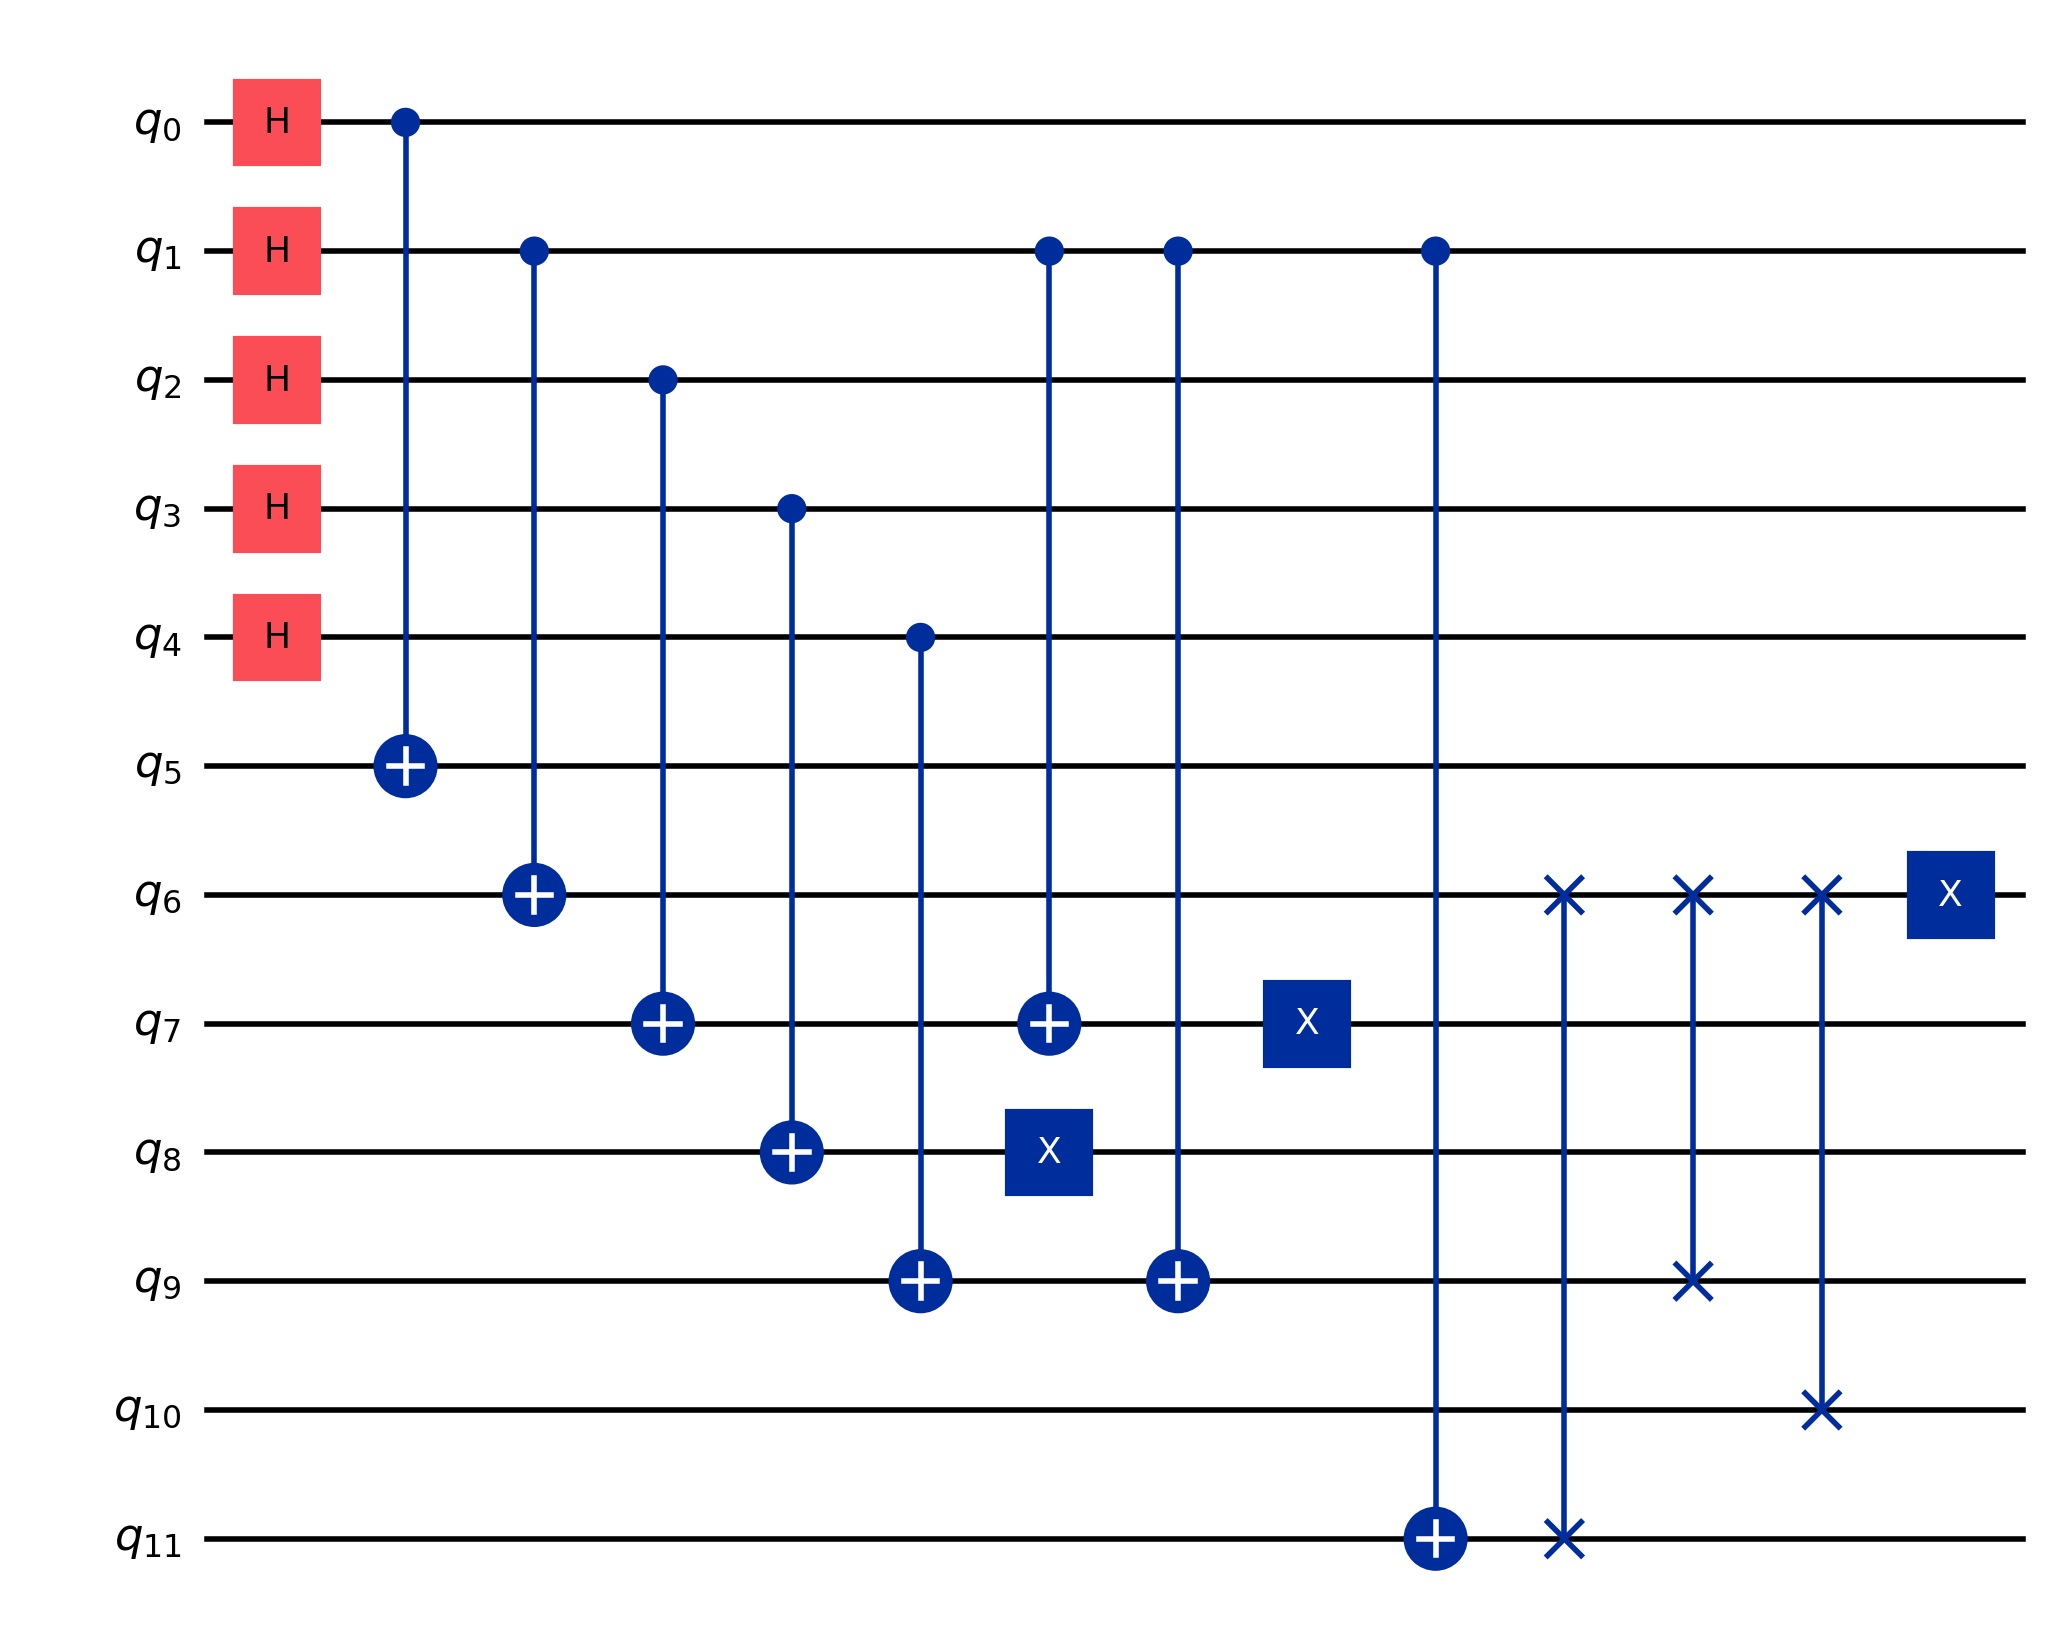

In [15]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)
 
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw('mpl')